In [59]:
import dill
dill.load_session('notebook_env.db')

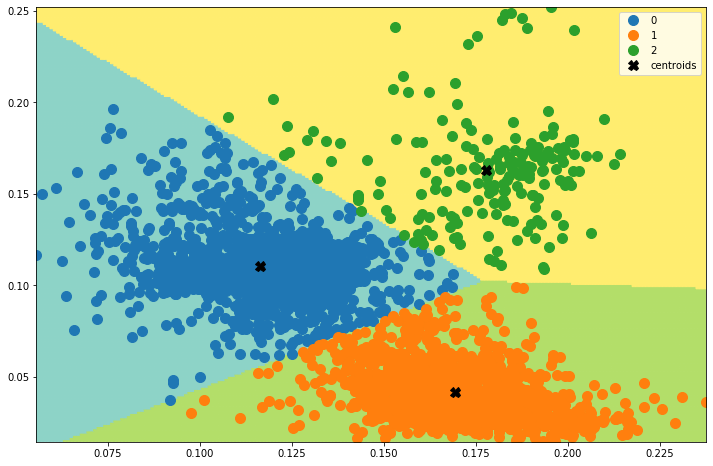

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
57,0.121683,0.086850,0.118237,0.030685,0.215295,0.184610,2.062324,8.465574,0.931661,0.549218,...,0.121683,0.130888,0.020356,0.271186,0.583417,0.007812,3.726562,3.718750,0.253221,0
58,0.135650,0.086412,0.126722,0.049986,0.228842,0.178856,1.388276,5.009017,0.952514,0.659814,...,0.135650,0.134314,0.060837,0.250000,1.108750,0.007812,4.296875,4.289062,0.369266,0
114,0.130411,0.093199,0.135240,0.025100,0.217032,0.191932,27.798182,834.800916,0.812734,0.403256,...,0.130411,0.107765,0.018713,0.170213,0.007812,0.007812,0.007812,0.000000,0.000000,0
485,0.138336,0.085693,0.126748,0.060881,0.238669,0.177788,2.668286,13.514607,0.943047,0.611900,...,0.138336,0.138233,0.016360,0.275862,1.106213,0.007812,4.421875,4.414062,0.230973,0
493,0.130537,0.085366,0.127362,0.050973,0.209649,0.158676,1.649246,6.034503,0.957993,0.698753,...,0.130537,0.131859,0.019093,0.242424,0.878606,0.007812,4.593750,4.585938,0.204429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,1


In [61]:
kmeans_extra = KMeans(n_clusters=3)
kmeans_extra.fit(data[["meanfun","IQR"]])
data_extra=data.copy()
data_extra.label=kmeans_extra.labels_
plt.figure(figsize=(12,8))
aux=pd.DataFrame({"X":data_extra["meanfun"],"Y":data_extra["IQR"],"C":data_extra["label"]})
plot_kmeans_decision_boundary(aux,kmeans_extra)
plt.legend()
plt.show()
data[kmeans_extra.labels_==2]

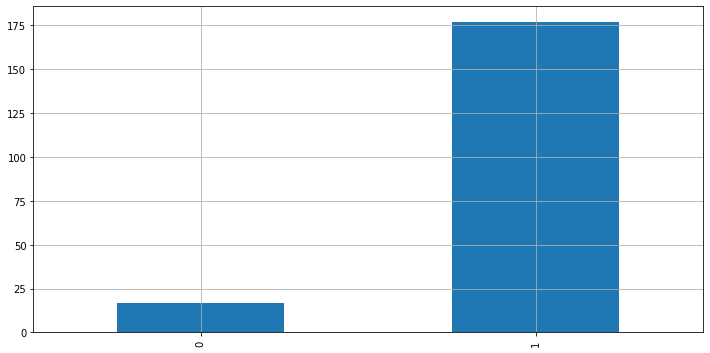

In [68]:
data[kmeans_extra.labels_==2].reset_index()["label"].value_counts().sort_index().plot.bar(figsize=(12,6))
plt.grid()
plt.show()


In [24]:
np.random.seed(1234)
data_extra_train, data_extra_test = train_test_split(data_extra, test_size=0.25)

In [25]:
extra_dt = DecisionTreeClassifier(max_depth=2)
extra_dt.fit(data_extra_train.drop('label',axis=1),data_extra_train['label'])
cluster_test=extra_dt.predict(data_extra_test.drop('label',axis=1))
print("Classification Report\n",classification_report(data_extra_test.label,cluster_test))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       397
           1       0.99      0.93      0.96       334
           2       0.81      0.90      0.85        61

    accuracy                           0.96       792
   macro avg       0.92      0.94      0.93       792
weighted avg       0.96      0.96      0.96       792



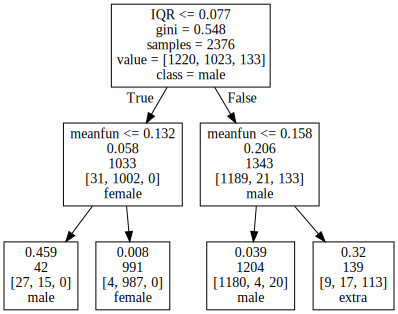

In [19]:
dot_data = tree.export_graphviz(extra_dt, out_file=None,feature_names=data_extra.columns[:-1],class_names=["male","female","extra"],rotate=False, label='root') 
graph = graphviz.Source(dot_data)
graph

In [15]:
extra_dt.n_classes_

3